In [8]:
# Configuration --- Change to your setup and preferences!
CAFFE_ROOT = "~/caffe2"

# What image do you want to test? Can be local or URL.
IMAGE_LOCATION = "images/cat.jpg"
#IMAGE_LOCATION = "https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Whole-Lemon.jpg/1235px-Whole-Lemon.jpg"
#IMAGE_LOCATION = "https://upload.wikimedia.org/wikipedia/commons/7/7c/Zucchini-Whole.jpg"
#IMAGE_LOCATION = "https://upload.wikimedia.org/wikipedia/commons/a/ac/Pretzel.jpg"
#IMAGE_LOCATION = "https://cdn.pixabay.com/photo/2015/02/10/21/28/flower-631765_1280.jpg"

# What model are we using? You should have already converted or downloaded one.
# format below is the model's: 
# folder, init_net, predict_net, mean, input image size
# you can switch the comments on MODEL to try out different model conversions
MODEL = 'squeezenet', 'squeeze_init_net.pb', 'squeeze_predict_net.pb', 'ilsvrc_2012_mean.npy', 227
#MODEL = 'bvlc_alexnet', 'init_net.pb', 'predict_net.pb', 'ilsvrc_2012_mean.npy', 224
print "Config set!"

Config set!


In [11]:
%matplotlib inline
from caffe2.proto import caffe2_pb2
import numpy as np
import skimage.io
import skimage.transform
from matplotlib import pyplot
import os
from caffe2.python import core, workspace
print("Required modules imported.")
def crop_center(img,cropx,cropy):
    y,x,c = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

def rescale(img, input_height, input_width):
    print("Original image shape:" + str(img.shape) + " and remember it should be in H, W, C!")
    print("Model's input shape is %dx%d") % (input_height, input_width)
    aspect = img.shape[1]/float(img.shape[0])
    print("Orginal aspect ratio: " + str(aspect))
    if(aspect>1):
        # landscape orientation - wide image
        res = int(aspect * input_height)
        imgScaled = skimage.transform.resize(img, (input_width, res))
    if(aspect<1):
        # portrait orientation - tall image
        res = int(input_width/aspect)
        imgScaled = skimage.transform.resize(img, (res, input_height))
    if(aspect == 1):
        imgScaled = skimage.transform.resize(img, (input_width, input_height))
    pyplot.figure()
    pyplot.imshow(imgScaled)
    pyplot.axis('on')
    pyplot.title('Rescaled image')
    print("New image shape:" + str(imgScaled.shape) + " in HWC")
    return imgScaled
print "Functions set."

Required modules imported.
Functions set.


('Found ', '/home/aaron/caffe2/models/squeezenet/squeeze_init_net.pb', ' Now looking for ', '/home/aaron/caffe2/models/squeezenet/squeeze_predict_net.pb')
All needed files found! Load the model in the next step.
Original image shape:(360, 480, 3) and remember it should be in H, W, C!
Model's input shape is 227x227
Orginal aspect ratio: 1.33333333333
New image shape:(227, 302, 3) in HWC
After crop:  (227, 227, 3)
NCHW:  (1, 3, 227, 227)
[u'data', u'conv1_w', u'conv1_b', u'fire2/squeeze1x1_w', u'fire2/squeeze1x1_b', u'fire2/expand1x1_w', u'fire2/expand1x1_b', u'fire2/expand3x3_w', u'fire2/expand3x3_b', u'fire3/squeeze1x1_w', u'fire3/squeeze1x1_b', u'fire3/expand1x1_w', u'fire3/expand1x1_b', u'fire3/expand3x3_w', u'fire3/expand3x3_b', u'fire4/squeeze1x1_w', u'fire4/squeeze1x1_b', u'fire4/expand1x1_w', u'fire4/expand1x1_b', u'fire4/expand3x3_w', u'fire4/expand3x3_b', u'fire5/squeeze1x1_w', u'fire5/squeeze1x1_b', u'fire5/expand1x1_w', u'fire5/expand1x1_b', u'fire5/expand3x3_w', u'fire5/expa

[array([280.0, 0.5343310832977295], dtype=object),
 array([281.0, 0.29759466648101807], dtype=object),
 array([277.0, 0.051699407398700714], dtype=object),
 array([284.0, 0.03905133903026581], dtype=object),
 array([276.0, 0.026918210089206696], dtype=object),
 array([150.0, 0.02139371819794178], dtype=object),
 array([282.0, 0.00573629280552268], dtype=object),
 array([462.0, 0.0031181375961750746], dtype=object),
 array([7.0, 0.003058328991755843], dtype=object),
 array([286.0, 0.002438740571960807], dtype=object),
 array([262.0, 0.0023153740912675858], dtype=object),
 array([279.0, 0.0018935234984382987], dtype=object),
 array([278.0, 0.0016641076654195786], dtype=object),
 array([355.0, 0.0015148549573495984], dtype=object),
 array([258.0, 0.0014199239667505026], dtype=object),
 array([903.0, 0.0009630105923861265], dtype=object),
 array([283.0, 0.0008293915307149291], dtype=object),
 array([330.0, 0.0006158520118333399], dtype=object),
 array([721.0, 0.00036464439472183585], dtype

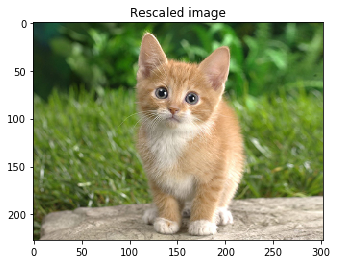

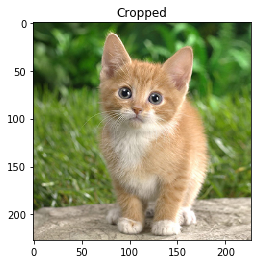

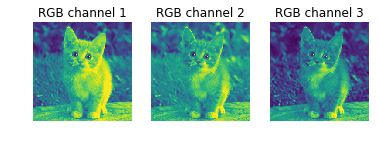

In [10]:
# set paths and variables from model choice
CAFFE_ROOT = os.path.expanduser(CAFFE_ROOT)
CAFFE_MODELS = os.path.join(CAFFE_ROOT, 'models')
MEAN_FILE = os.path.join(CAFFE_MODELS, MODEL[0], MODEL[3])
INPUT_IMAGE_SIZE = MODEL[4]
if not os.path.exists(CAFFE_ROOT):
    print("Houston, you may have a problem.") 
INIT_NET = os.path.join(CAFFE_MODELS, MODEL[0], MODEL[1])
PREDICT_NET = os.path.join(CAFFE_MODELS, MODEL[0], MODEL[2])
if not os.path.exists(INIT_NET):
    print(INIT_NET + " not found!")
else:
    print("Found ", INIT_NET, " Now looking for ", PREDICT_NET)
    if not os.path.exists(PREDICT_NET):
        print("Caffe model file, " + PREDICT_NET + " was not found!")
    else:
        print('All needed files found! Load the model in the next step.')
        
#init = open(INIT_NET).read()
#predict = open(INIT_NET).read()

p = workspace.Predictor(INIT_NET, PREDICT_NET)
  
img = skimage.img_as_float(skimage.io.imread(IMAGE_LOCATION)).astype(np.float32)
img = rescale(img, INPUT_IMAGE_SIZE, INPUT_IMAGE_SIZE)
img = crop_center(img, INPUT_IMAGE_SIZE, INPUT_IMAGE_SIZE)
print "After crop: " , img.shape
pyplot.figure()
pyplot.imshow(img)
pyplot.axis('on')
pyplot.title('Cropped')

# switch to CHW
img = img.swapaxes(1, 2).swapaxes(0, 1)
pyplot.figure()
for i in range(3):
    # For some reason, pyplot subplot follows Matlab's indexing
    # convention (starting with 1). Well, we'll just follow it...
    pyplot.subplot(1, 3, i+1)
    pyplot.imshow(img[i])
    pyplot.axis('off')
    pyplot.title('RGB channel %d' % (i+1))

# switch to BGR
img = img[(2, 1, 0), :, :]

# remove mean for better results
mean = np.load(MEAN_FILE).mean(1).mean(1)
img = img * 255 - mean[:, np.newaxis, np.newaxis]

# add batch size
img = img[np.newaxis, :, :, :].astype(np.float32)
print "NCHW: ", img.shape

# run the net and return prediction
result = p.run([img])
result = np.asarray(result)
print result.shape
result = np.delete(result, 1)
#print result
# imagenet index begins with 1!
index = 1
highest = 0
arr = np.empty((0,2), dtype=object)
arr[:,0] = int(10)
arr[:,1:] = float(10)
for i, r in enumerate(result):
    arr = np.append(arr, np.array([[i,r]]), axis=0)
    #print arr
    if (r > highest):
        highest = r
        index = i 
        #print i, " :: ", r

print index, " :: ", highest
sorted(arr, key=lambda x: x[1], reverse=True)
